<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/PCA_image_lossy_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson on lossy compression (PCA applied to image)

### Lesson Summary: PCA for Image Compression and Understanding

### Learning Objectives

* Understand how Principal Component Analysis (PCA) can be applied to images.
* Observe how PCA captures the most significant patterns in image data.
* Visualize how the number of principal components affects image reconstruction.
* Appreciate the trade-off between compression and information loss.

### Key Concepts

* **PCA** is a dimensionality reduction technique that identifies directions (principal components) along which the variance in the data is maximized.
* Images can be viewed as high-dimensional data (each pixel as a feature), and PCA helps reduce that dimensionality while preserving key patterns.

### Procedure Overview

1. **Load and display an image** from a URL.
2. **Apply PCA to each RGB channel** of the image separately.
3. **Reconstruct the image** using an increasing number of principal components.
4. **Visualize the reconstructions** to show how few components capture most of the image's structure.

### Takeaway Message

PCA can significantly reduce image data dimensionality while preserving salient features, making it a powerful tool for image compression and understanding. However, perfect reconstruction is only possible with all components, revealing the balance between efficiency and fidelity.


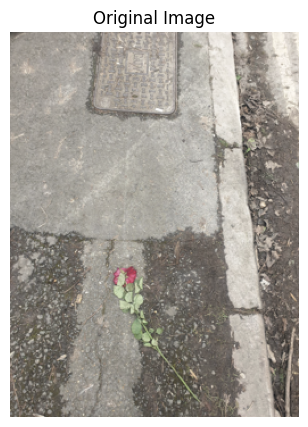

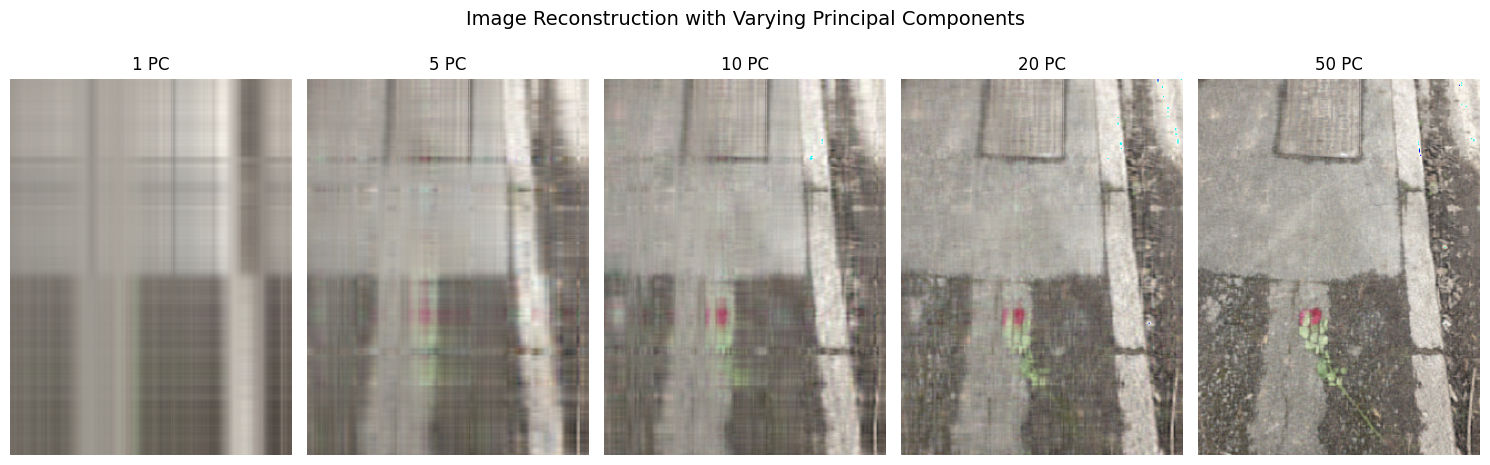

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io
from skimage.transform import rescale
import requests
from PIL import Image
from io import BytesIO

# Load the image from GitHub
url = "https://raw.githubusercontent.com/neelsoumya/python_machine_learning/main/images/rose_after_valentines_day.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Resize for computational ease (optional)
img = img.resize((img.width // 4, img.height // 4))
img_np = np.array(img)

# Display original image
plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(img_np)
plt.axis("off")
plt.show()

# Function to apply PCA to each color channel
def pca_on_channel(channel_data, n_components):
    original_shape = channel_data.shape
    flat_data = channel_data.reshape(-1, 1)
    pca = PCA(n_components=n_components)
    reduced = pca.fit_transform(flat_data)
    reconstructed = pca.inverse_transform(reduced)
    return reconstructed.reshape(original_shape)

# Apply PCA to each channel separately with varying components
components_list = [1, 5, 10, 20, 50]
fig, axs = plt.subplots(1, len(components_list), figsize=(15, 5))

for i, n_components in enumerate(components_list):
    # Flatten each channel for PCA
    reconstructed_channels = []
    for c in range(3):  # RGB
        channel = img_np[:, :, c]
        h, w = channel.shape
        pca = PCA(n_components=n_components)
        reduced = pca.fit_transform(channel)
        reconstructed = pca.inverse_transform(reduced)
        reconstructed_channels.append(reconstructed)

    reconstructed_img = np.stack(reconstructed_channels, axis=2).astype(np.uint8)
    axs[i].imshow(reconstructed_img)
    axs[i].set_title(f"{n_components} PC")
    axs[i].axis("off")

plt.suptitle("Image Reconstruction with Varying Principal Components", fontsize=14)
plt.tight_layout()
plt.show()
